In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression class

In [2]:
# X = [n x m]
# w = [m x 1]
# y = [n x 1]

In [3]:
class LogisticRegression:
    def __init__(self, 
                 iter_num = 50, 
                 step = 0.1):
        self.iter_num = iter_num
        self.step = step
        

    def fit(self, X, y):

        # add constant column to take intercept into account
        X = self.__update_X(X)

        # y = [n x 1]
        y = y.reshape(-1, 1)
        
        self.n = X.shape[0] # number of rows
        self.m = X.shape[1] # number of features (including intercept)

        # set initial values of weights
        # w = [m x 1]
        self.w = np.random.rand(self.m, 1)

        # gradient descent
        loss = []
        for _ in range(self.iter_num):
            self.w = self.w - self.step * self.__gradient(X, y)
            loss.append(self.loss_func(self.sigmoid(np.dot(X, self.w)), y))
        return loss

    
    def predict(self, X):
        # add constant column to take intercept into account
        X = self.__update_X(X)
        return self.sigmoid(np.dot(X, self.w))

    
    def score(self, y_pred, y_true, threshold = 0.5):
        y_pred = y_pred.reshape((-1, 1))
        y_true = y_true.reshape((-1, 1))
        return np.sum((y_pred > threshold).astype(int) == y_true)/y_true.shape[0]
            
        
    def __gradient(self, X, y):
        y_hat = self.sigmoid(np.dot(X, self.w))
        
        d_w = (1/self.n) * np.dot(X.T, y_hat - y)
        
        return d_w.reshape((-1, 1))
        

    @staticmethod
    def sigmoid(z):
        return 1/(1 + np.exp(-z))

    
    @staticmethod
    def loss_func(y_pred, y_true):
        y_pred = y_pred.reshape((-1, 1))
        y_true = y_true.reshape((-1, 1))
        assert y_pred.shape == y_true.shape
        
        return (1/(2*y_pred.shape[0])) * np.sum(-y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    @staticmethod
    def __update_X(X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
 

## Test

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 50, 
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 42)

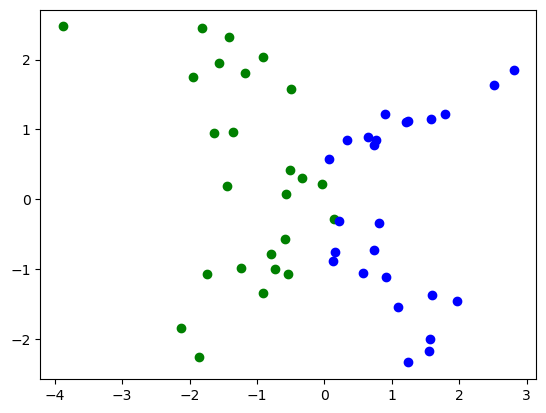

In [5]:
mask = y == 0
plt.scatter(X[mask, 0], X[mask, 1], c = 'green', label = '0')
plt.scatter(X[~mask, 0], X[~mask, 1], c = 'blue', label = '1')

Text(0.5, 1.0, 'Training Loss')

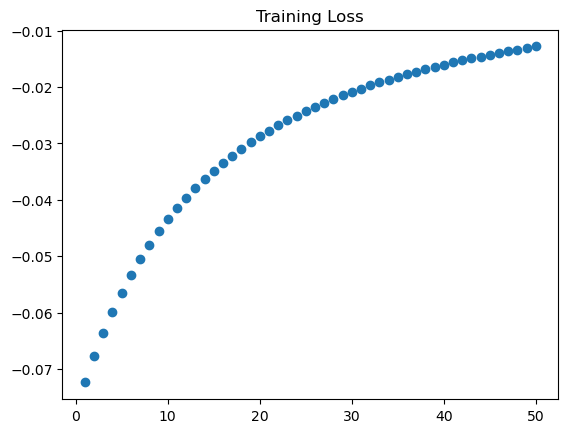

In [6]:
lr = LogisticRegression()
history = lr.fit(X, y)

plt.scatter(range(1, len(history) + 1), history)
plt.title("Training Loss")

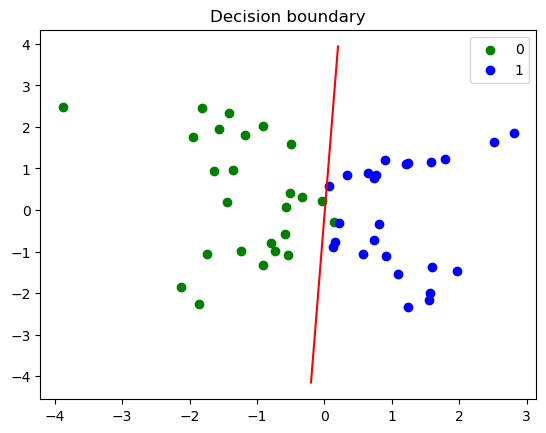

In [7]:
mask = y == 0
plt.scatter(X[mask, 0], X[mask, 1], c = 'green', label = '0')
plt.scatter(X[~mask, 0], X[~mask, 1], c = 'blue', label = '1')

# Calculate the intercept and gradient of the decision boundary
c = -lr.w[0]/lr.w[1]
m = -lr.w[1]/lr.w[2]

# generate the line
xmin, xmax = -0.2, 0.2
xd = np.array([xmin, xmax])
yd = m * xd + c

plt.plot(xd, yd, color = 'red')
plt.title('Decision boundary')
plt.legend()

In [8]:
lr.score(lr.predict(X), y)

0.96